In [7]:
from IPython.display import Image
Image(url='https://vesg.ipsl.upmc.fr/thredds/fileServer/IPSLFS/jservon/CliMAF_Notebooks_html/CliMAF-logo-small.png') 

# CliMAF: Climate Model Assessment Framework
### A science-oriented framework to ease the analysis of climate model simulations
##### WP5 ANR Convergence
##### Development team: Stéphane Sénési (CNRM-GAME), Gaëlle Rigoudy (CNRM-GAME), Jérôme Servonnat (LSCE-IPSL), Ludivine Vignon (CNRM-GAME), Laurent Franchisteguy (CNRM-GAME), Patrick Brockmann (LSCE-IPSL)
##### Beta-testing: Olivier Marti (LSCE-IPSL), Marie-Pierre Moine (CERFACS), Emilia Sanchez-Gomez (CERFACS)
##   
##### contact: climaf@meteo.fr
##### users list: climaf-users@meteo.fr

# Getting started with plot()

- 1. basic 2D map
- 2. edit the titles
- 3. change font sizes
- 4. change color palette, isolines
- 5. ocean view: choose the longitude in the middle of the plot
- 6. use any ncl resource with 'options'
    - 6.1. Raster plot (with 'options')
- 7. Polar Stereographic projections
- 8. add the contours of an auxilliary file
- 9. Vectors of a wind field
- 10. add a pattern (like statistical significance)
- 11. Plot a region on an ORCA grid: need to regrid first on a regular grid
- 12. Zonal mean atmospheric plot
- 13. Various fancy projections available with 'proj'
    - 13.1 the cool Satellite projection

#  

## Import climaf

In [8]:
from climaf.api import *
clog('critical') # min verbosity = critical < warning < info < debug = max verbosity

#  

## 0. Get a dataset

In [9]:
dat = ds(project='CMIP5', model='CNRM-CM5', experiment='historical', frequency='monthly', version='v20130101',
         period='1980-2005', variable='tos', realm='ocean' )
summary(dat)

/bdd/CMIP5/output/CNRM-CERFACS/CNRM-CM5/historical/mon/ocean/Omon/r1i1p1/v20130101/tos/tos_Omon_CNRM-CM5_historical_r1i1p1_198001-198912.nc
/bdd/CMIP5/output/CNRM-CERFACS/CNRM-CM5/historical/mon/ocean/Omon/r1i1p1/v20130101/tos/tos_Omon_CNRM-CM5_historical_r1i1p1_199001-199912.nc
/bdd/CMIP5/output/CNRM-CERFACS/CNRM-CM5/historical/mon/ocean/Omon/r1i1p1/v20130101/tos/tos_Omon_CNRM-CM5_historical_r1i1p1_200001-200512.nc


{u'domain': u'global',
 u'experiment': 'historical',
 u'frequency': 'monthly',
 u'model': 'CNRM-CM5',
 u'period': 1980-2005,
 u'project': 'CMIP5',
 u'realization': u'r1i1p1',
 u'realm': 'ocean',
 u'root': u'/bdd',
 u'simulation': u'',
 u'table': u'*',
 u'variable': 'tos',
 u'version': 'v20130101'}

#  
## 1. Basic plot

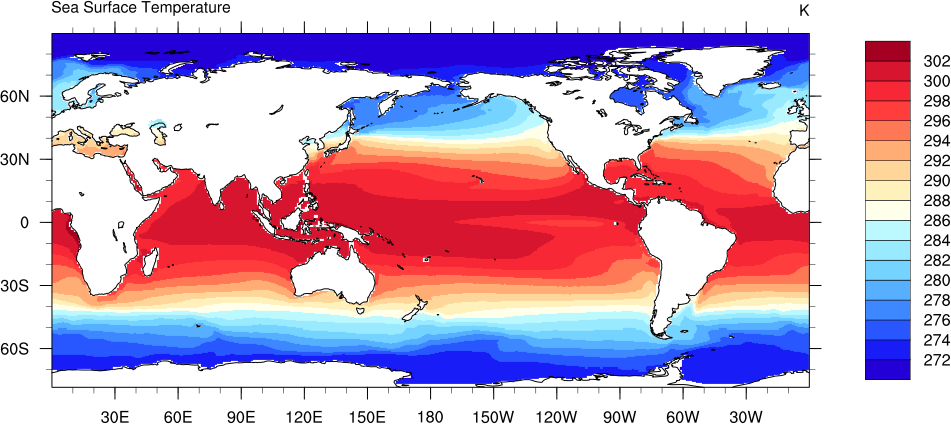

In [10]:
myplot = plot(time_average(dat))
iplot(myplot)

#  
## 2. Edit the titles

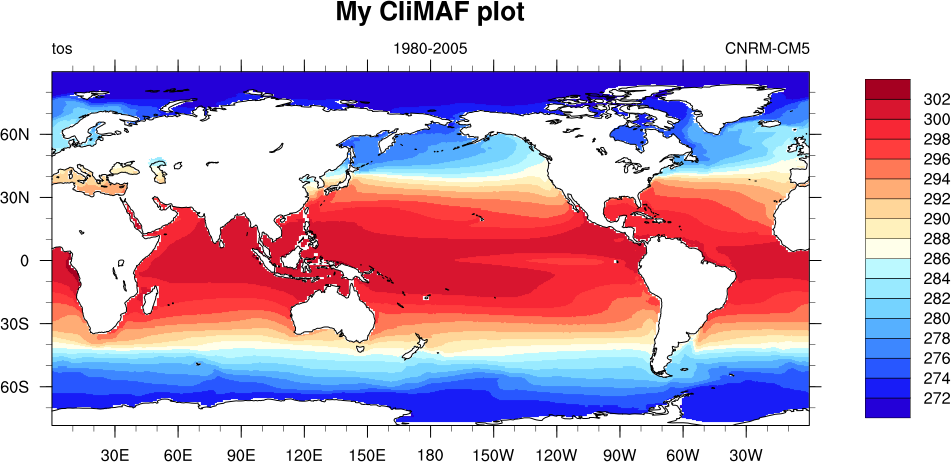

In [11]:
myplot = plot(time_average(dat),
              title='My CliMAF plot',
              gsnLeftString=dat.variable,
              gsnCenterString=dat.period,
              gsnRightString=dat.model)
iplot(myplot)

#  
## 3. Change the font size

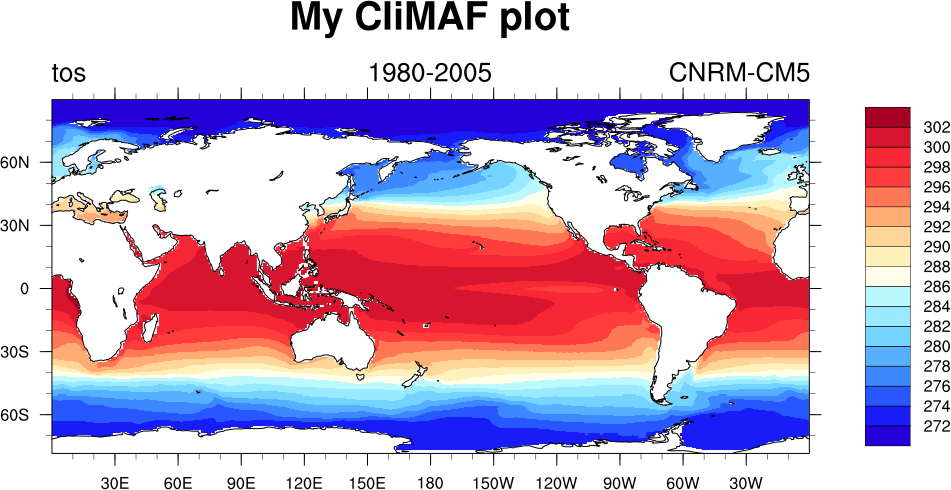

In [12]:
myplot = plot(time_average(dat),
              # -- Title
              title='My CliMAF plot',
                  tiMainFontHeightF=0.03,#default = 0.025
              # -- Subtitles
              gsnLeftString=dat.variable,
              gsnCenterString=dat.period,
              gsnRightString=dat.model,
                  gsnStringFontHeightF=0.02, #default=0.012
              )
iplot(myplot)

### Size of the Axis labels, colorbar labels, the fonts: see http://climaf.readthedocs.org/en/dev/scripts/plot.html?highlight=plot

#  
## 4. Change the colorpalette and the isolines

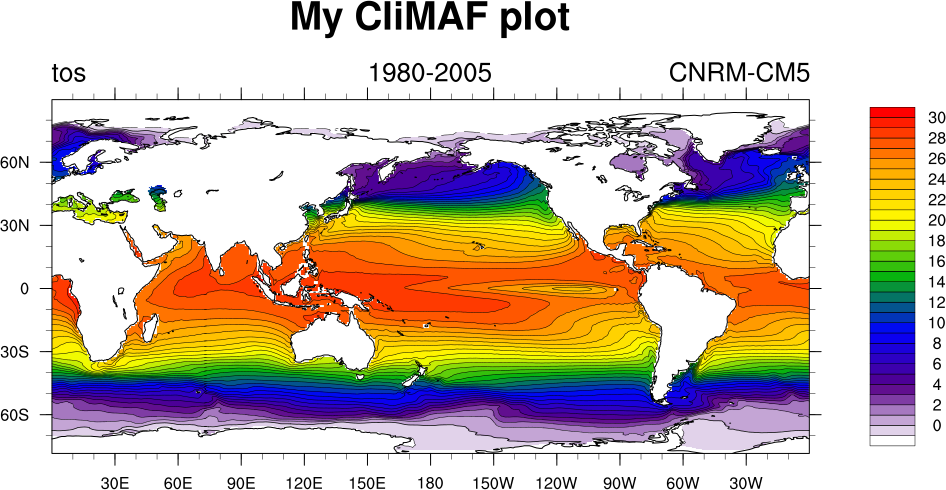

In [13]:
myplot = plot(time_average(dat),
              # -- Title
              title='My CliMAF plot',
              tiMainFontHeightF=0.03,#default = 0.025
              # -- Subtitles
              gsnLeftString=dat.variable,
              gsnCenterString=dat.period,
              gsnRightString=dat.model,
              gsnStringFontHeightF=0.02, #default=0.012
                  # -- Colorpalette
                  color='WhViBlGrYeOrRe',
                  # -- Add contours
                  contours=1,
                  # -- Isolines
                  min=-1,max=30,delta=1,
                  # -- And add an offset to switch from K to degC
                  offset = -273.15
              )
iplot(myplot)

#  
## 5. Ocean view: put longitude 200°E in the center (mpCenterLonF=200), and shade the land with grey (focus='ocean')

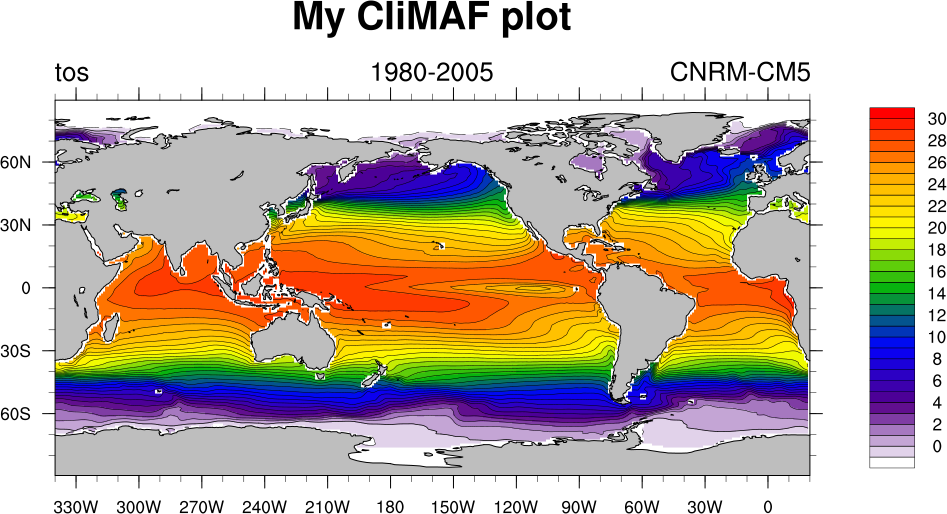

In [14]:
myplot = plot(regridn(time_average(dat),cdogrid='r360x180'),
              # -- Title
              title='My CliMAF plot',
              tiMainFontHeightF=0.03,#default = 0.025
              # -- Subtitles
              gsnLeftString=dat.variable,
              gsnCenterString=dat.period,
              gsnRightString=dat.model,
              gsnStringFontHeightF=0.02, #default=0.012
              # -- Colorpalette
              color='WhViBlGrYeOrRe',
              # -- Add contours
              contours=1,
              # -- Isolines
              min=-1,max=30,delta=1,
              # -- And add an offset to switch from K to degC
              offset = -273.15,
                  # -- Longitude in the middle of the plot
                  mpCenterLonF=200,
                  # -- Grey on lands
                  focus='ocean'
              )
iplot(myplot)

#  
## 6. options = how to use any ncl resource : options

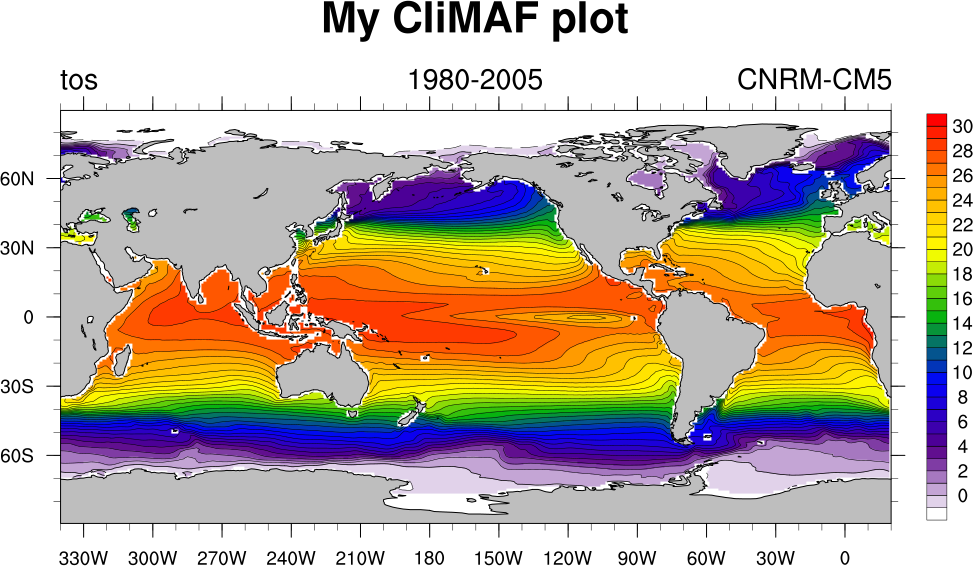

In [15]:
myplot = plot(regridn(time_average(dat),cdogrid='r360x180'),
              # -- Title
              title='My CliMAF plot',
              tiMainFontHeightF=0.03,#default = 0.025
              # -- Subtitles
              gsnLeftString=dat.variable,
              gsnCenterString=dat.period,
              gsnRightString=dat.model,
              gsnStringFontHeightF=0.02, #default=0.012
              # -- Colorpalette
              color='WhViBlGrYeOrRe',
              # -- Add contours
              contours=1,
              # -- Isolines
              min=-1,max=30,delta=1,
              # -- And add an offset to switch from K to degC
              offset = -273.15,
              # -- Longitude in the middle of the plot
              mpCenterLonF=200,
              # -- Grey on lands
              focus='ocean',
                  # -- OPTIONS
                  options='pmLabelBarWidthF=0.065'
                  #options='pmLabelBarWidthF=0.065|'+\
                  #        'pmLabelBarOrthogonalPosF=0.01|'+\
                  #        'lbLabelFontHeightF=0.01|'+\
                  #        'tmXBLabelFontHeightF=0.01|'+\
                  #        'tmYLLabelFontHeightF=0.01'
              )
iplot(myplot)

### 6.1 Create a raster plot with options

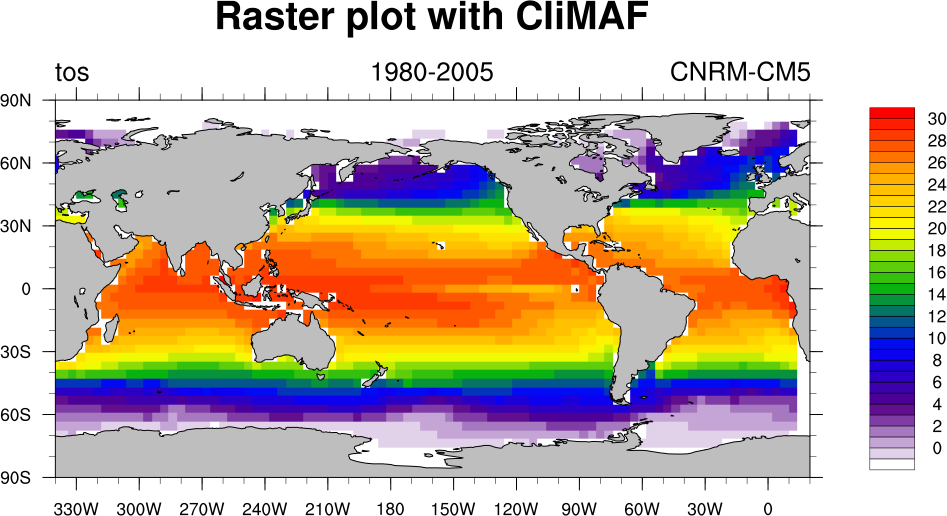

In [16]:
myplot = plot(regridn(time_average(dat),cdogrid='r90x45'), # --> Interpolate to coarser grid to see the raster
              # -- Title
              title='Raster plot with CliMAF',
              tiMainFontHeightF=0.03,#default = 0.025
              # -- Subtitles
              gsnLeftString=dat.variable,
              gsnCenterString=dat.period,
              gsnRightString=dat.model,
              gsnStringFontHeightF=0.02, #default=0.012
              # -- Colorpalette
              color='WhViBlGrYeOrRe',
                  # -- deactivate the contours
                  # contours=1,
              # -- Isolines
              min=-1,max=30,delta=1,
              # -- And add an offset to switch from K to degC
              offset = -273.15,
              # -- Longitude in the middle of the plot
              mpCenterLonF=200,
              # -- Grey on lands
              focus='ocean',
                  # -- Use OPTIONS for the argument of the Raster plot
                  options='cnFillMode=RasterFill|cnRasterSmoothingOn=False'
              )
iplot(myplot)

#  
## 7. Polar stereographic views

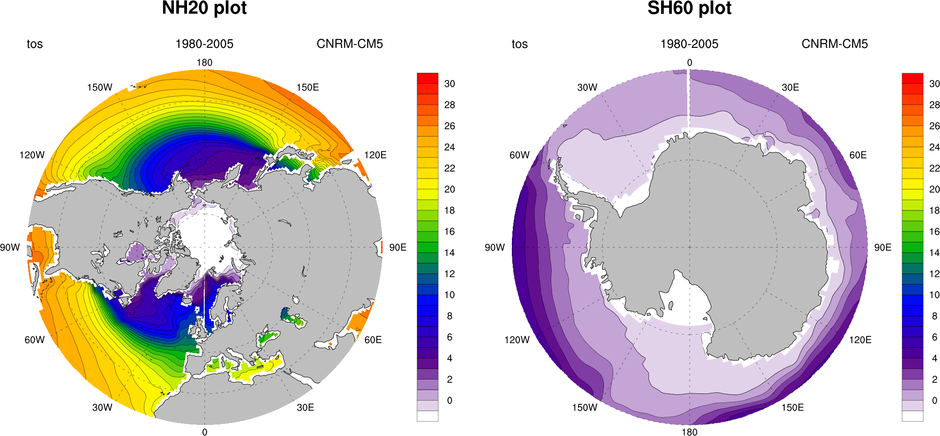

In [17]:
# --> Set proj to 'NH' or 'SH'; the two additionnal characters set the last latitude visible 

projNH = 'NH20'
myplotNH = plot(regridn(clim_average(dat,'ANM'),cdogrid='r360x180'),
              # -- Title
              title=projNH+' plot',
              tiMainFontHeightF=0.03,#default = 0.025
              # -- Subtitles
              gsnLeftString=dat.variable,
              gsnCenterString=dat.period,
              gsnRightString=dat.model,
              gsnStringFontHeightF=0.02, #default=0.012
              # -- Colorpalette
              color='WhViBlGrYeOrRe',
              # -- Add contours
              contours=1,
              # -- Isolines
              min=-1,max=30,delta=1,
              # -- And add an offset to switch from K to degC
              offset = -273.15,
              # -- Longitude in the middle of the plot
              mpCenterLonF=200,
              # -- Grey on lands
              focus='ocean',
                  # -- Northern Hemisphere projection
                  proj=projNH
              )

projSH = 'SH60'
myplotSH = plot(regridn(clim_average(dat,'ANM'),cdogrid='r360x180'),
              # -- Title
              title=projSH+' plot',
              tiMainFontHeightF=0.03,#default = 0.025
              # -- Subtitles
              gsnLeftString=dat.variable,
              gsnCenterString=dat.period,
              gsnRightString=dat.model,
              gsnStringFontHeightF=0.02, #default=0.012
              # -- Colorpalette
              color='WhViBlGrYeOrRe',
              # -- Add contours
              contours=1,
              # -- Isolines
              min=-1,max=30,delta=1,
              # or: colors='-1 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30'
              # -- And add an offset to switch from K to degC
              offset = -273.15,
              # -- Longitude in the middle of the plot
              mpCenterLonF=200,
              # -- Grey on lands
              focus='ocean',
                  # -- Northern Hemisphere projection
                  proj=projSH,
              )

iplot(cpage(fig_lines=[[myplotNH,myplotSH]]))

#  
## 8. Add the contours of an auxillary file

In [18]:
# -- Get an auxillary file
aux = ds(project='CMIP5', model='CNRM-CM5', experiment='historical', frequency='monthly', version='v20130101',
         period='1980-2005', variable='sic')#, realm='ocean' )
summary(aux)

/bdd/CMIP5/output/CNRM-CERFACS/CNRM-CM5/historical/mon/seaIce/OImon/r1i1p1/v20130101/sic/sic_OImon_CNRM-CM5_historical_r1i1p1_185001-200512.nc


{u'domain': u'global',
 u'experiment': 'historical',
 u'frequency': 'monthly',
 u'model': 'CNRM-CM5',
 u'period': 1980-2005,
 u'project': 'CMIP5',
 u'realization': u'r1i1p1',
 u'realm': u'*',
 u'root': u'/bdd',
 u'simulation': u'',
 u'table': u'*',
 u'variable': 'sic',
 u'version': 'v20130101'}

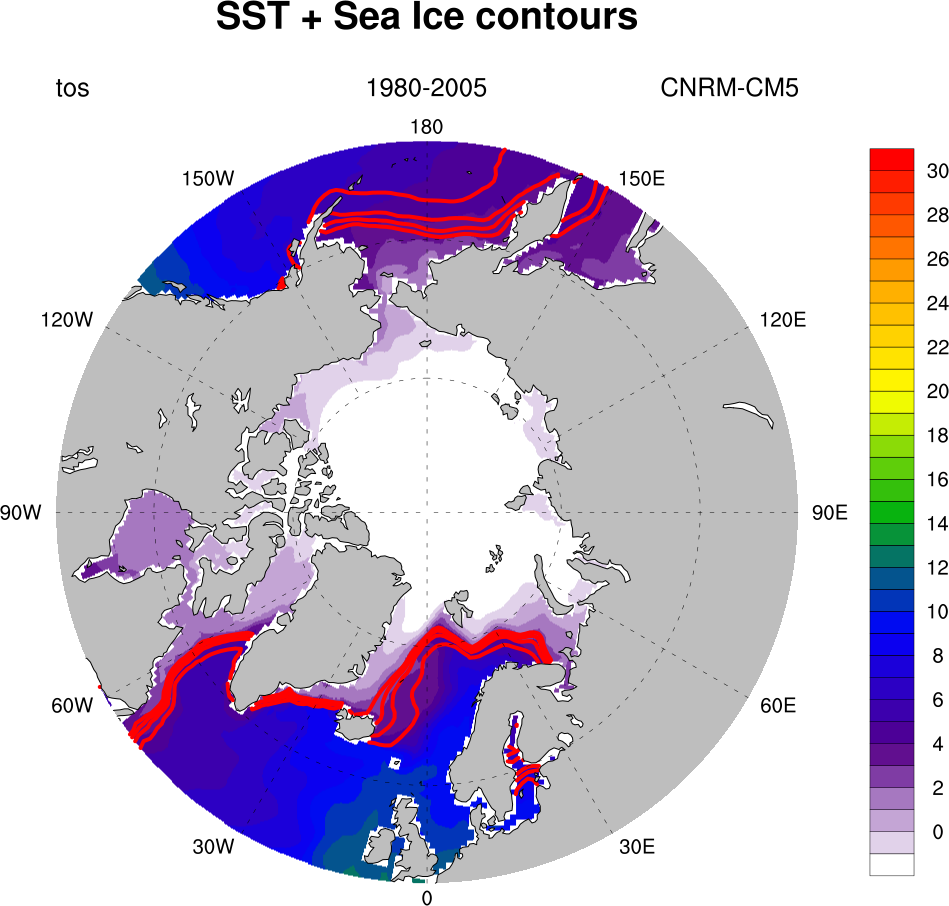

In [19]:
# --> Provide the auxillary field as a second argument
myplotNH = plot(time_average(dat),
                    # -- Auxillary field provided as a second argument
                    time_average(aux),
                    # -- Add contours
                    contours='1 5 10 15',
                    # -- Handle options on the auxillary field
                    aux_options='cnLineThicknessF=8|cnLineColor=Red',
              # -- Title
              title='SST + Sea Ice contours',
              tiMainFontHeightF=0.03,#default = 0.025
              # -- Subtitles
              gsnLeftString=dat.variable,
              gsnCenterString=dat.period,
              gsnRightString=dat.model,
              gsnStringFontHeightF=0.02, #default=0.012
              # -- Colorpalette
              color='WhViBlGrYeOrRe',
              # -- Isolines
              min=-1,max=30,delta=1,
              # -- And add an offset to switch from K to degC
              offset = -273.15,
              # -- Longitude in the middle of the plot
              mpCenterLonF=200,
              # -- Grey on lands
              focus='ocean',
              # -- Northern Hemisphere projection
              proj='NH50'
              )
iplot(myplotNH)

#  
## 9. Add the vectors of a wind field

In [20]:
tauu = ds(project='CMIP5', model='CNRM-CM5', experiment='historical', frequency='monthly', version='v20130101',
          period='1980-2005', variable='tauuo')
tauv = ds(project='CMIP5', model='CNRM-CM5', experiment='historical', frequency='monthly', version='v20130101',
          period='1980-2005', variable='tauvo')
summary(tauv)

/bdd/CMIP5/output/CNRM-CERFACS/CNRM-CM5/historical/mon/ocean/Omon/r1i1p1/v20130101/tauvo/tauvo_Omon_CNRM-CM5_historical_r1i1p1_198001-198912.nc
/bdd/CMIP5/output/CNRM-CERFACS/CNRM-CM5/historical/mon/ocean/Omon/r1i1p1/v20130101/tauvo/tauvo_Omon_CNRM-CM5_historical_r1i1p1_199001-199912.nc
/bdd/CMIP5/output/CNRM-CERFACS/CNRM-CM5/historical/mon/ocean/Omon/r1i1p1/v20130101/tauvo/tauvo_Omon_CNRM-CM5_historical_r1i1p1_200001-200512.nc


{u'domain': u'global',
 u'experiment': 'historical',
 u'frequency': 'monthly',
 u'model': 'CNRM-CM5',
 u'period': 1980-2005,
 u'project': 'CMIP5',
 u'realization': u'r1i1p1',
 u'realm': u'*',
 u'root': u'/bdd',
 u'simulation': u'',
 u'table': u'*',
 u'variable': 'tauvo',
 u'version': 'v20130101'}

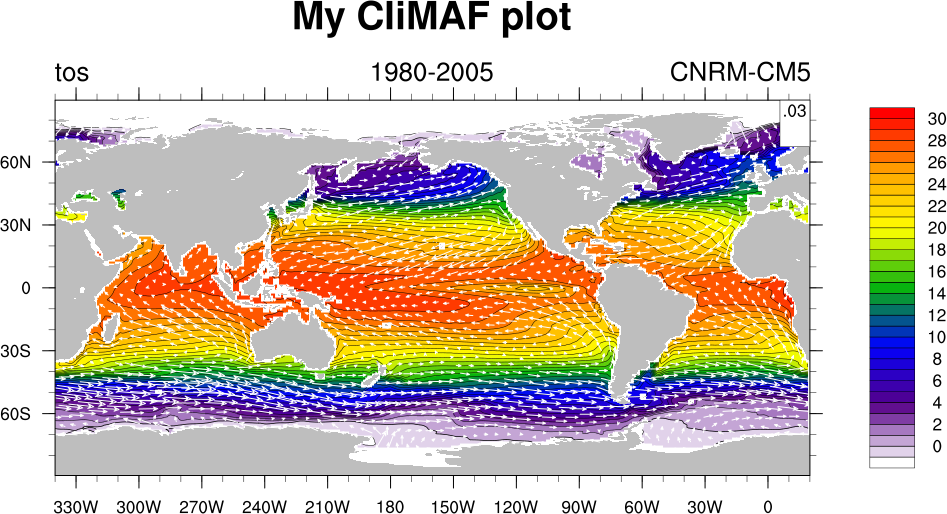

In [21]:
myplot = plot(regridn(time_average(dat),cdogrid='r360x180'),
                  # -- Specific to the plot of wind vectors:
                  None,
                  time_average(tauu),time_average(tauv),
                  vcRefLengthF=0.005, vcRefMagnitudeF=0.03,vcMinDistanceF=0.01,vcLineArrowColor='White',
              # -- Title
              title='My CliMAF plot',
              tiMainFontHeightF=0.03,#default = 0.025
              # -- Subtitles
              gsnLeftString=dat.variable,
              gsnCenterString=dat.period,
              gsnRightString=dat.model,
              gsnStringFontHeightF=0.02, #default=0.012
              # -- Colorpalette
              color='WhViBlGrYeOrRe',
              # -- Add contours
              contours=1,
              # -- Isolines
              min=-1,max=30,delta=1,
              # -- And add an offset to switch from K to degC
              offset = -273.15,
              # -- Longitude in the middle of the plot
              mpCenterLonF=200,
              # -- Grey on lands
              focus='ocean'
              )
iplot(myplot)

#  
## 10. Add a pattern

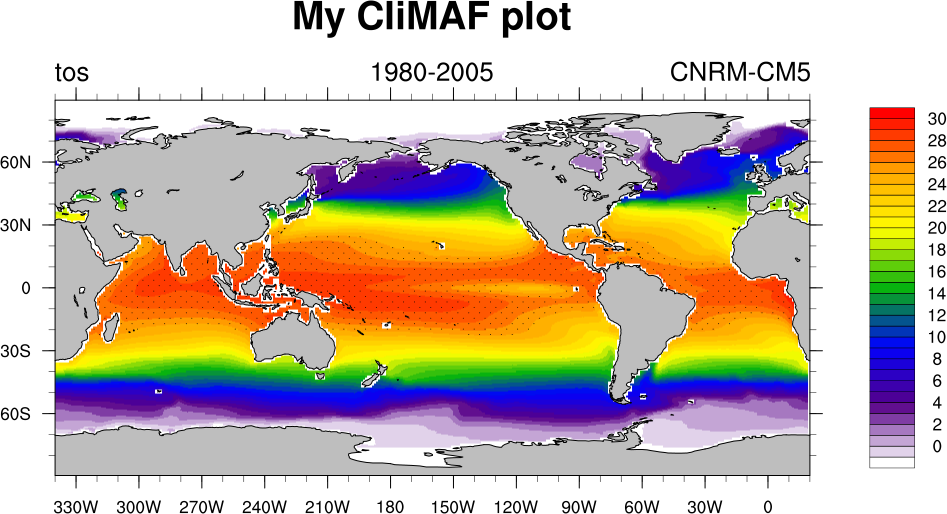

In [22]:
myplot = plot(regridn(time_average(dat),cdogrid='r360x180'),
                  # -- Pattern
                  regridn(time_average(dat),cdogrid='r360x180'),
                  shade_above = 298,
                  #shade_below = 5,
                  #offset_aux = -273.15,
                  #shading_options='gsnShadeHigh=6',
                  # https://www.ncl.ucar.edu/Document/Graphics/Images/fillpatterns.png
              # -- Title
              title='My CliMAF plot',
              tiMainFontHeightF=0.03,#default = 0.025
              # -- Subtitles
              gsnLeftString=dat.variable,
              gsnCenterString=dat.period,
              gsnRightString=dat.model,
              gsnStringFontHeightF=0.02, #default=0.012
              # -- Colorpalette
              color='WhViBlGrYeOrRe',
              # -- Add contours
              #contours=1,
              # -- Isolines
              min=-1,max=30,delta=1,
              # -- And add an offset to switch from K to degC
              offset = -273.15,
              # -- Longitude in the middle of the plot
              mpCenterLonF=200,
              # -- Grey on lands
              focus='ocean'
              )
iplot(myplot)

#  
## 11. Plot a region on an ORCA grid: need to regrid first on a regular grid!

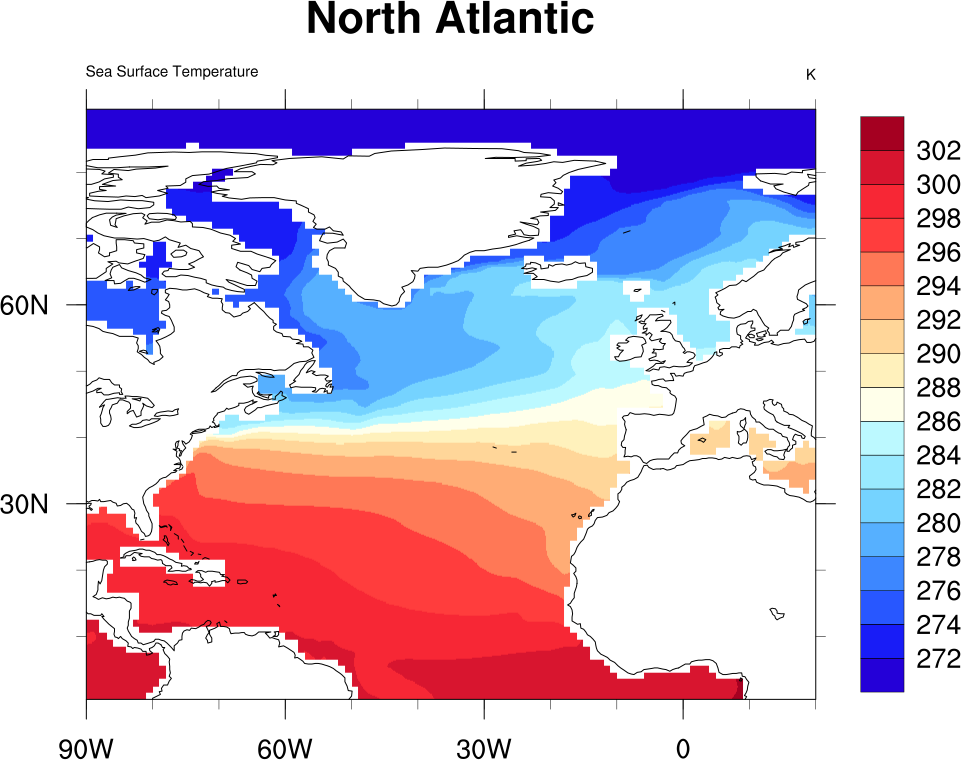

In [23]:
rgrd_dat = regridn(time_average(dat),cdogrid='r360x180')
myplot = plot(llbox(rgrd_dat,lonmin=-90,lonmax=20,latmin=0,latmax=90), title='North Atlantic')

iplot(myplot)

#  
## 12. Zonal mean atmospheric field

In [24]:
# -- A zonal field
## Add the contours of an auxillary file
ua_dat = ds(project='CMIP5', model='CNRM-CM5', experiment='historical', frequency='monthly', version='latest',
            period='1980-2005', variable='ua')#, realm='ocean' )
summary(ua_dat)

/bdd/CMIP5/output/CNRM-CERFACS/CNRM-CM5/historical/mon/atmos/Amon/r1i1p1/latest/ua/ua_Amon_CNRM-CM5_historical_r1i1p1_195001-200512.nc


{u'domain': u'global',
 u'experiment': 'historical',
 u'frequency': 'monthly',
 u'model': 'CNRM-CM5',
 u'period': 1980-2005,
 u'project': 'CMIP5',
 u'realization': u'r1i1p1',
 u'realm': u'*',
 u'root': u'/bdd',
 u'simulation': u'',
 u'table': u'*',
 u'variable': 'ua',
 u'version': 'latest'}

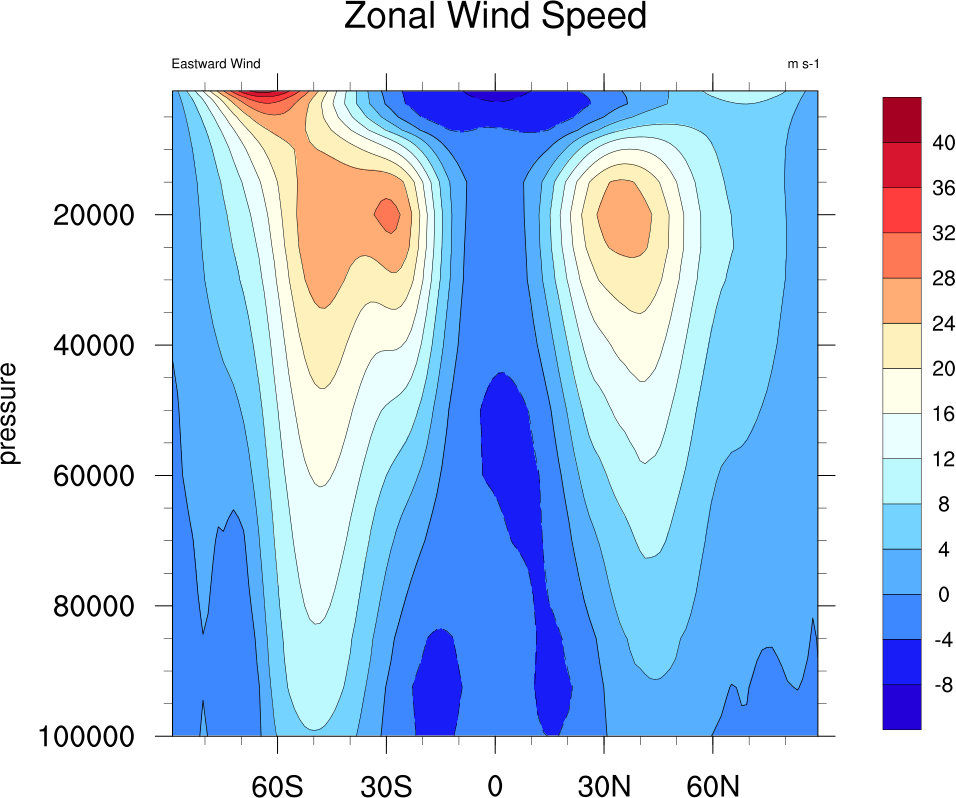

In [25]:
zonmean_plot = plot(zonmean(clim_average(ua_dat,'ANM')),title='Zonal Wind Speed',contours=1,y='lin')
iplot(zonmean_plot)

### 13. Various fancy projections available with proj
see all projections here: https://www.ncl.ucar.edu/Document/Graphics/map_projections.shtml

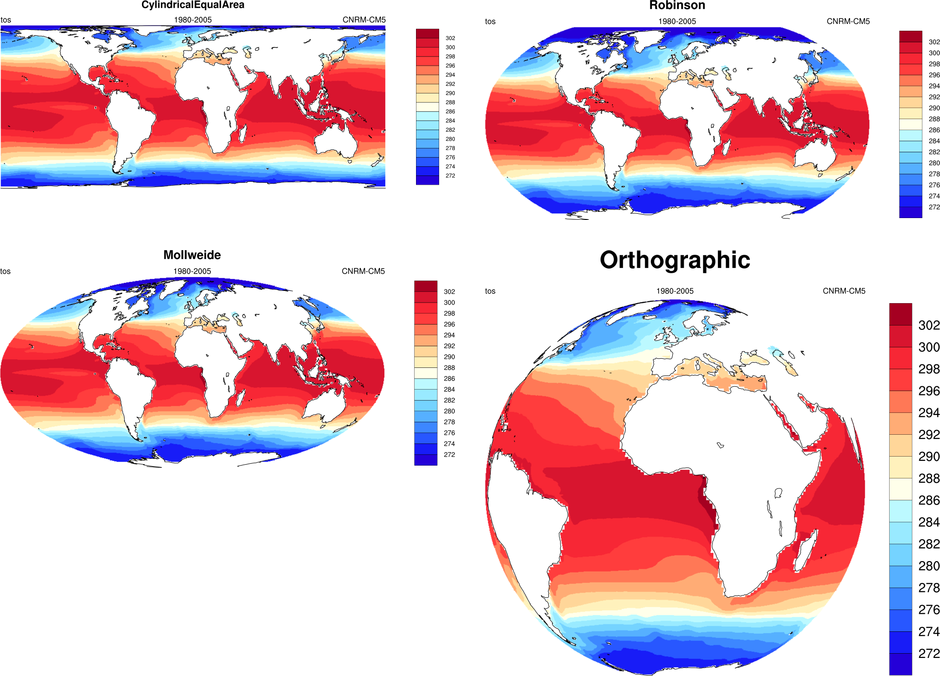

In [26]:
pp = dict(gsnLeftString=dat.variable,
          gsnCenterString=dat.period,
          gsnRightString=dat.model)

proj = 'CylindricalEqualArea'
p1 = plot(time_average(dat), title=proj, proj=proj, **pp)
proj = 'Robinson'
p2 = plot(time_average(dat), title=proj, proj=proj, **pp)
proj = 'Mollweide'
p3 = plot(time_average(dat), title=proj, proj=proj, **pp)
proj = 'Orthographic'
p4 = plot(time_average(dat), title=proj, proj=proj, **pp)

iplot(cpage(fig_lines = [[p1,p2],[p3,p4]]))

### 13.1 : Satellite projection

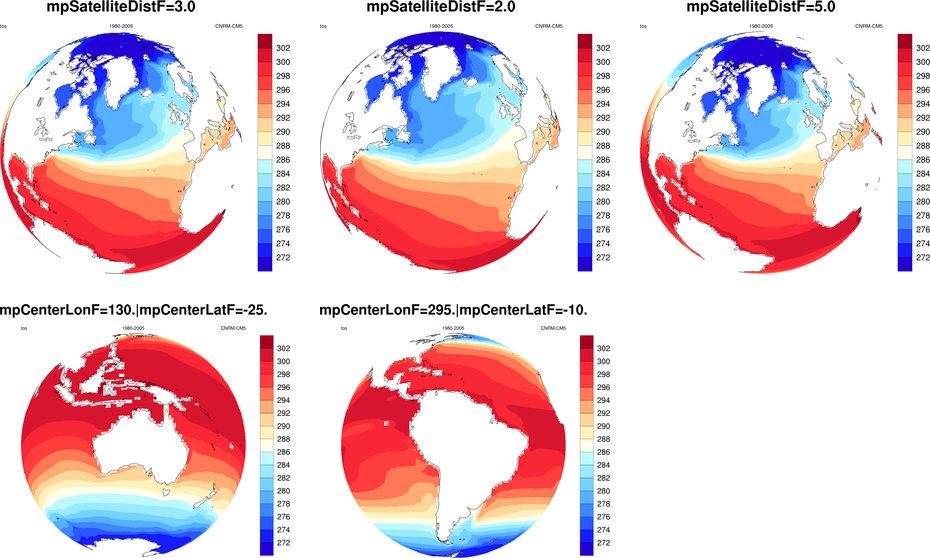

In [27]:
pp = dict(gsnLeftString=dat.variable,
          gsnCenterString=dat.period,
          gsnRightString=dat.model,
)

p1 = plot(time_average(dat), proj='Satellite',
              title='mpSatelliteDistF=3.0',
              options='mpCenterLonF=-40.|mpCenterLatF=45.|mpSatelliteDistF=3.0',
          **pp
          )
p2 = plot(time_average(dat), proj='Satellite',
              title='mpSatelliteDistF=2.0',
              options='mpCenterLonF=-40.|mpCenterLatF=45.|mpSatelliteDistF=2.0',
          **pp
          )
p3 = plot(time_average(dat), proj='Satellite',
              title='mpSatelliteDistF=5.0',
              options='mpCenterLonF=-40.|mpCenterLatF=45.|mpSatelliteDistF=5.0',
          **pp
          )
p4 = plot(time_average(dat), proj='Satellite',
              title='mpCenterLonF=130.|mpCenterLatF=-25.',
              options='mpCenterLonF=130.|mpCenterLatF=-25.|mpSatelliteDistF=3.0',
          **pp
          )
p5 = plot(time_average(dat), proj='Satellite',
              title='mpCenterLonF=295.|mpCenterLatF=-10.',
              options='mpCenterLonF=295.|mpCenterLatF=-10.|mpSatelliteDistF=3.0',
          **pp
          )


iplot(cpage(fig_lines=[[p1,p2,p3],[p4,p5,None]]))

## Questions?
### -> https://climaf.readthedocs.io/en/master/scripts/plot.html
### -> climaf@meteo.fr